# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import RandomState
import math

from scipy import stats as st

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

### Предпросмотр данных

In [3]:
def hist_pl(data):
    cl = ['f0', 'f1', 'f2', 'product'] 
    for i in cl:
        sns.set()        
        f, axes = plt.subplots(1, 2, figsize=(16, 4))
        f.suptitle('Распределние значений в столбце "{}"'.format(i), y = 1.2, fontsize = 30)
        sns.histplot(data[i], ax=axes[0])
        sns.boxplot(data=data[i], ax=axes[1])
        plt.show()

#### Первый регион

In [4]:
display(df_1.head(10))
display(df_1.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

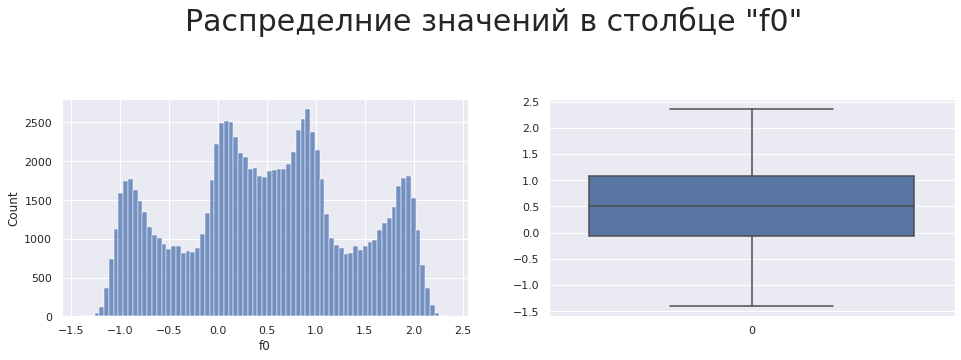

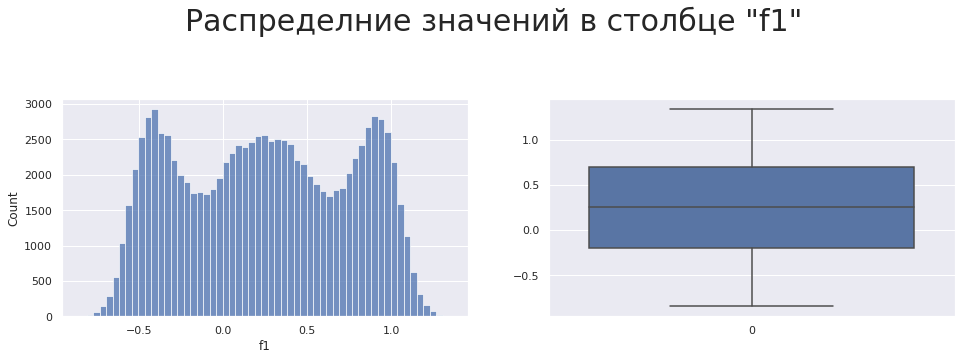

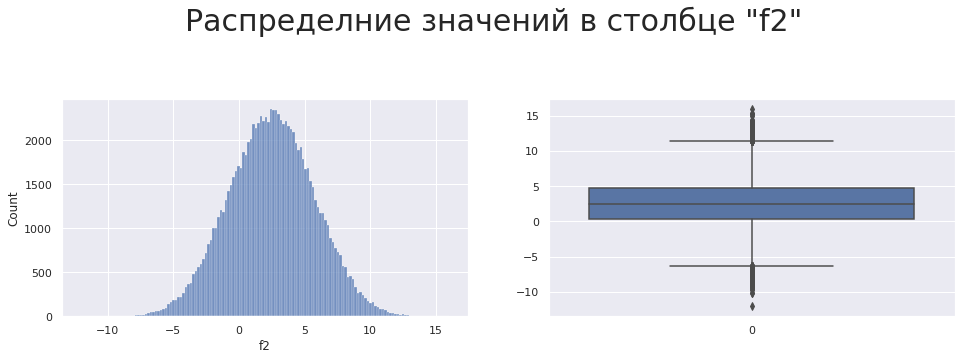

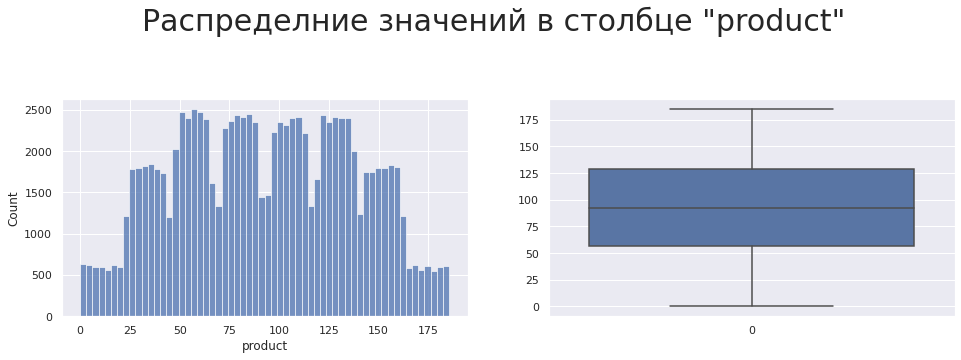

In [5]:
hist_pl(df_1)

#### Второй регион

In [6]:
display(df_2.head(10))
display(df_2.info())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

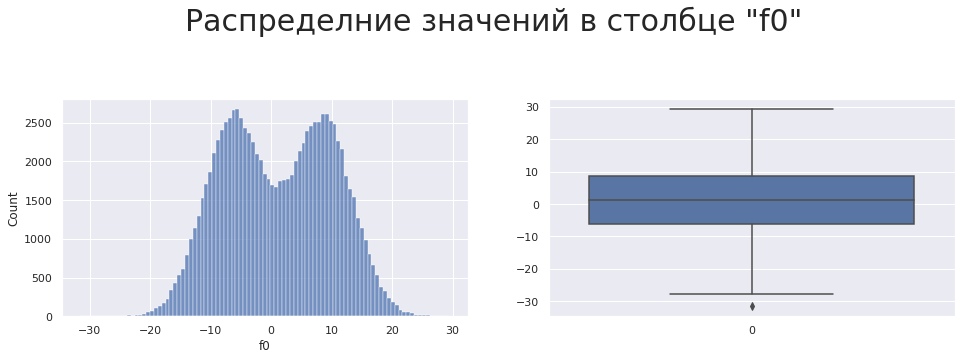

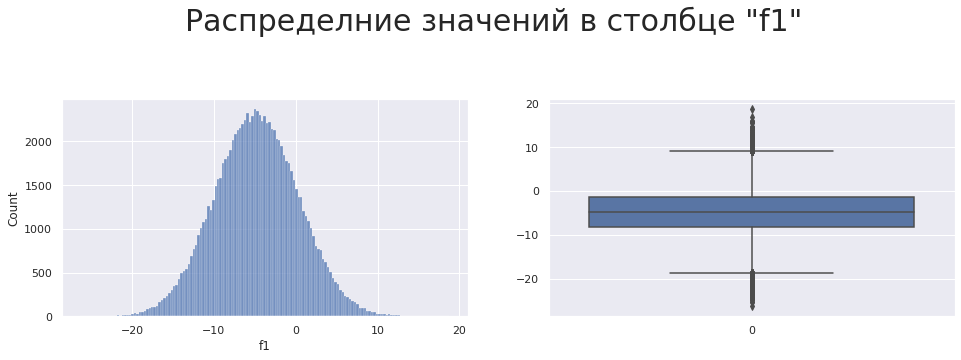

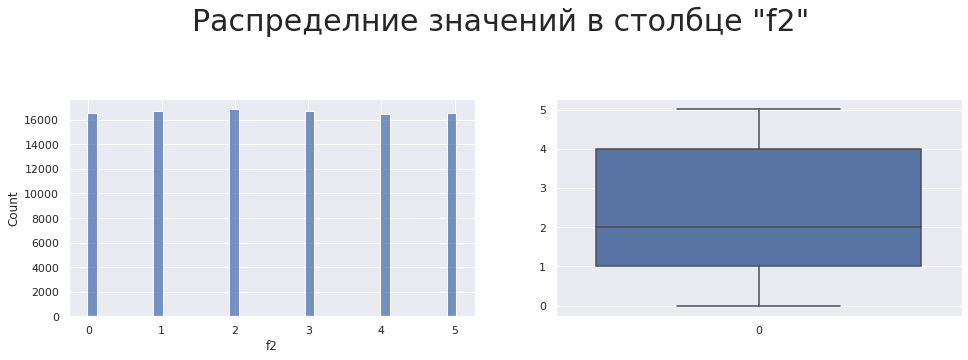

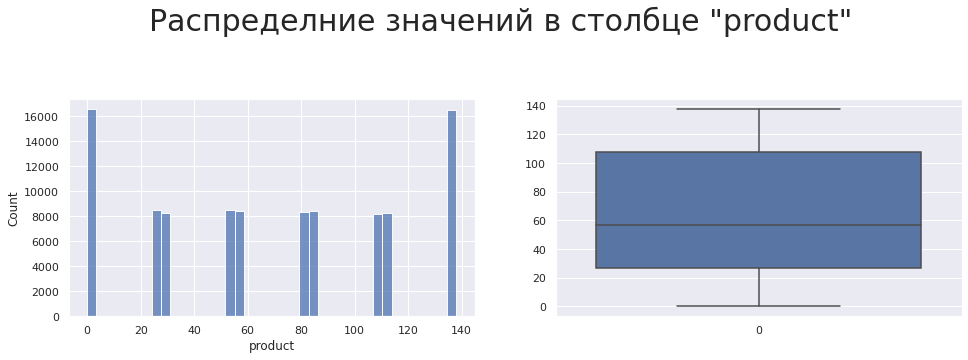

In [7]:
hist_pl(df_2)

#### Третий регион

In [8]:
display(df_3.head(10))
display(df_3.info())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

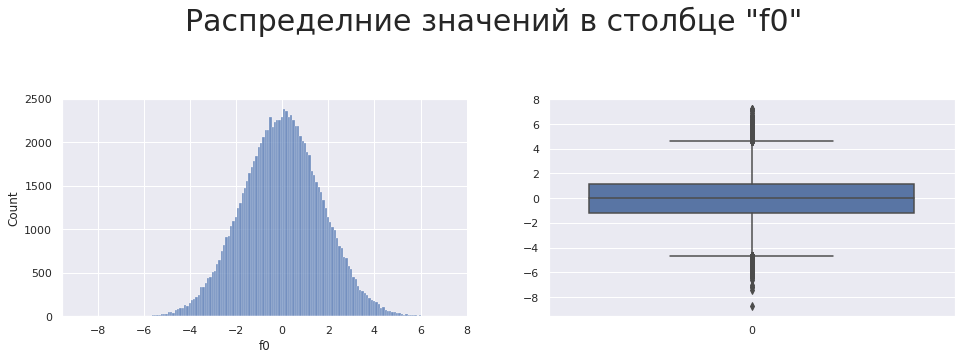

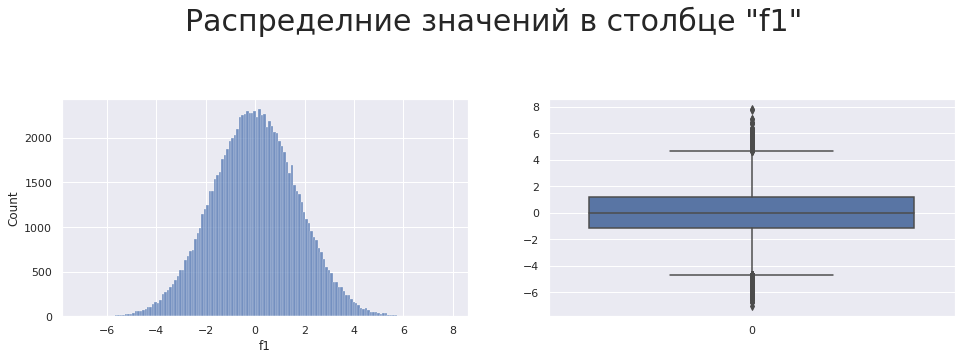

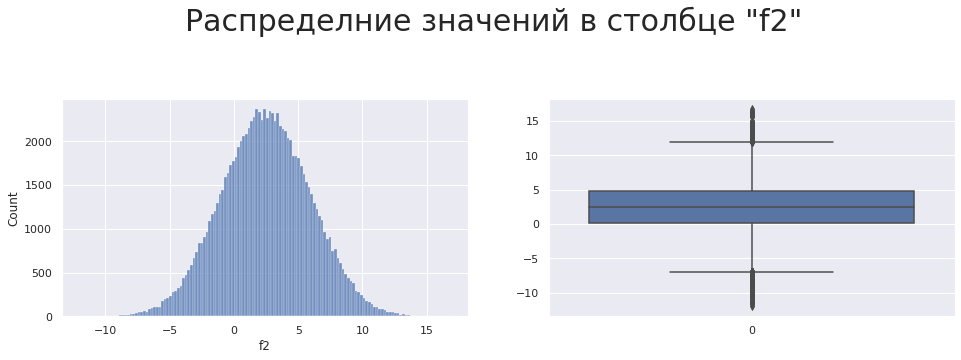

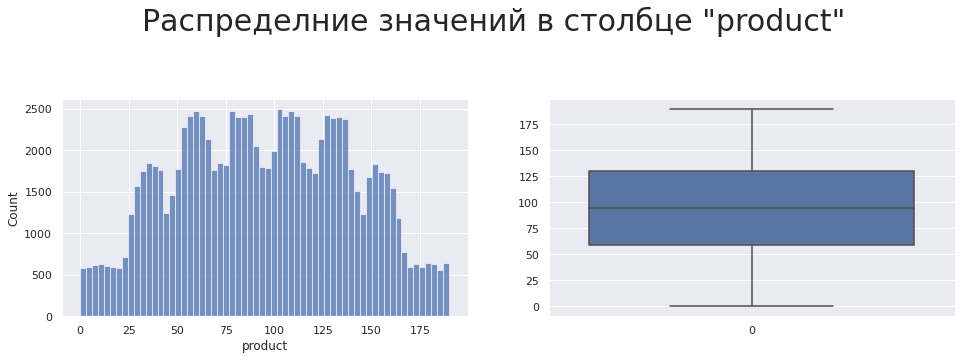

In [9]:
hist_pl(df_3)

### Выводы

- Данные загружены. Пропусков нет.
- Распределение некоторых признаков отличается от нормального. Есть несущественные выбросы.

## Обучение и проверка модели

Выделим целевой признак для каждого региона.

In [10]:
X_1 = df_1.drop(['id','product'],  axis=1)
X_2 = df_2.drop(['id','product'],  axis=1)
X_3 = df_3.drop(['id','product'],  axis=1)

y_1 = df_1['product']
y_2 = df_2['product']
y_3 = df_3['product']

- Разделим данные на обучающую и валидационную выборки
- Выведем средний запас сырья и RMSE модели.

In [11]:
state=np.random.RandomState(12345)

X_train_1, X_valid_1, y_train_1, y_valid_1 = (
    train_test_split(
        X_1,
        y_1,
        test_size=0.25,
        random_state=state        
    )
)

model_1 = LinearRegression()
model_1.fit(X_train_1, y_train_1)
predictions_1 = model_1.predict(X_valid_1)

mse = mean_squared_error(y_valid_1, predictions_1)
rmse = mse ** 0.5
mean = predictions_1.mean()

print('Регион №1')
print('MSE: ', mse)
print('RMSE: ', rmse)
print('Cредний запас сырья: ', mean)

Регион №1
MSE:  1412.2129364399243
RMSE:  37.5794217150813
Cредний запас сырья:  92.59256778438035


In [12]:
X_train_2, X_valid_2, y_train_2, y_valid_2 = (
    train_test_split(
        X_2,
        y_2,
        test_size=0.25,
        random_state=state        
    )
)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
predictions_2 = model_2.predict(X_valid_2)

mse = mean_squared_error(y_valid_2, predictions_2)
rmse = mse ** 0.5
mean = predictions_2.mean()

print('Регион №2')
print('MSE: ', mse)
print('RMSE: ', rmse)
print('Cредний запас сырья: ', mean)

Регион №2
MSE:  0.791631526595205
RMSE:  0.889736773768065
Cредний запас сырья:  68.76995145799754


In [13]:
X_train_3, X_valid_3, y_train_3, y_valid_3 = (
    train_test_split(
        X_3,
        y_3,
        test_size=0.25,
        random_state=state        
    )
)

model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
predictions_3 = model_3.predict(X_valid_3)

mse = mean_squared_error(y_valid_3, predictions_3)
rmse = mse ** 0.5
mean = predictions_3.mean()

print('Регион №3')
print('MSE: ', mse)
print('RMSE: ', rmse)
print('Cредний запас сырья: ', mean)

Регион №3
MSE:  1596.6451571969324
RMSE:  39.958042459521614
Cредний запас сырья:  95.087528122523


### Выводы

- Разбили данные на обучающую и валидационную выборки
- Обучили модели и сделали предсказания, сохранили их и правильные ответы, посчитали средний запас сырья для каждого региона и RMSE
- В регионе 2 средний показатель запаса предсказанного сырья составляет 68.7 (ниже остальных регионов). Однако RMSE в данном регионе также мал (0.88). Это говорит о точности предсказаний и качестве построенной модели.
- У регионов 1 и 3, больше 90 тыс. бареллей. Здесь же значение RMSE получилось очень большим, почти половина этого числа. Это свидетельствует о неоднозначности показателя, неточности модели регрессии.

## Подготовка к расчёту прибыли

In [14]:
all_points = 500
best_point = 200
budget = 10**10
profit_bar = 4.5 * 10**5
risk = 0.025

In [15]:
min_value = budget / (profit_bar * best_point) 
print("Минимальный объём сырья для безубыточной разработки новой скважины: ", math.ceil(min_value))

Минимальный объём сырья для безубыточной разработки новой скважины:  112


### Выводы

Для безубыточной разработки новой скважины необходимо переработать как минимум 112 единиц продукта. Предсказания объема нефти во всех регионах гораздо меньше этого объема.

## Расчёт прибыли и рисков 

In [16]:
def profit(target, probabilities, point):
    
    '''    
    target - истинные значения целевого признака
    probabilities - предсказания
    point - количество скважин    
    '''
    target = pd.Series(target).reset_index(drop=True)
    probabilities = pd.Series(probabilities).reset_index(drop=True)
    
    probabilities_sorted = probabilities.sort_values(ascending = False)
    income = target[probabilities_sorted.index][:point].sum() * profit_bar
    revenue = income - budget
    
    return revenue

In [17]:
def bootstrap (target, predictions):
    values = []
    for i in range(1000):
        target_subsample = (
            target.reset_index(drop=True).sample(
                n=all_points,
                replace=True,
                random_state=state
            )
        )
        probs_subsample = predictions[target_subsample.index]    

        values.append(profit(target_subsample, probs_subsample, best_point))

    values = pd.Series(values)      
    
    loc = values.mean()
    
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
                            
    print("Средняя выручка:", round(loc / (10**6), 2), '(млн. руб.)')
    print("Доверительный интервал:", round(lower / (10**6), 2), ':', round(upper / (10**6), 2), '(млн. руб.)')
    print("Риски убытка:", (values < 0).mean() * 100, '%')

In [18]:
print('Регион №1')
bootstrap(y_valid_1, predictions_1)

Регион №1
Средняя выручка: 394.28 (млн. руб.)
Доверительный интервал: -69.45 : 915.5 (млн. руб.)
Риски убытка: 6.1 %


In [19]:
print('Регион №2')
bootstrap(y_valid_2, predictions_2)

Регион №2
Средняя выручка: 454.74 (млн. руб.)
Доверительный интервал: 61.07 : 855.91 (млн. руб.)
Риски убытка: 0.7000000000000001 %


In [20]:
print('Регион №3')
bootstrap(y_valid_3, predictions_3)

Регион №3
Средняя выручка: 353.66 (млн. руб.)
Доверительный интервал: -162.65 : 847.76 (млн. руб.)
Риски убытка: 7.6 %


### Выводы

Регион №2 можно считать лучшим вариантом для разработки, так как риск убытка минимален, а предполагаемая выручка выше.

## Общий вывод

- Изучены данные трех регионов для нефтедобычи
- Для каждого региона обучена модель линейной регресии, посчитаны возможная прибыль и риски.
- По полученным данным, можно рекомендовать регион №2 к разработке. Добыча в этом регионе связана с меньшими рисками и может принести большую прибль, относительно других регионов.


## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован